# Projeto Final

In [175]:
# importanto bibliotecas
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Explore os dados

In [176]:
projetofinal = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [177]:
projetofinal.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [178]:
projetofinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [179]:
novas = []
for col in projetofinal.columns:
    name1 = col.lower()
    novas.append(name1)
projetofinal.columns = novas

In [180]:
projetofinal.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid'],
      dtype='object')

In [181]:
projetofinal['invoicedate'] = pd.to_datetime(projetofinal['invoicedate'], errors='coerce')

In [182]:
projetofinal['invoicedate'] = pd.to_datetime(projetofinal['invoicedate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

Nesses primeiros códigos, primeiramente foram baixados os dados, analisada a tabela e os seus tipos. Depois, para facilitar as análises futuras, foi alterado os nomes das colunas, colocando tudo em letras minuscúlas. Depois, como a coluna "invoicedate" (data e hora) está como tipo objeto e para poder trabalhar com datas é necessário que esteja no formato datetime. Então, foi feita a conversão e também o formato da data e hora.

In [183]:
projetofinal.isna().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
dtype: int64

Nesse código foi verificado uma possível existência de valores ausentes. Tivemos como resultado que as colunas "description" e "customerid" possuem valores ausentes. A coluna "description" contém o nome do item do pedido. Como todo item possui um identificador específico, é possível preencher esses valores com o valor correspondente da coluna "stockcode" (na tabela de dados original no sistema). Já a coluna "customerid" contém o ID do cliente que efetuou a compra. Como não foi preenchido no ato da compra, não é possível preencher esse valor com nenhum tipo de dado utilizando dados de outras linhas ou colunas. 

In [184]:
projetofinal_duplicated = projetofinal[projetofinal.duplicated()]
print(projetofinal_duplicated)

       invoiceno stockcode                        description  quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               invoicedate  unitprice  customerid  
517    2018-11-29 11:45:00       1.25     17908

Nesse código foi verificado uma possível existência de valores duplicados. Tivemos como resultado um DataFrame com 5268 linhas. Ou seja, foram encontrados 5268 linhas com valores duplicados, sendo o valor duplicado na coluna "invoiceno", que possui o identificador do pedido, que teoricamente é único. Além disso, os valores das colunas "stockcode" (identificador do item) e "description" (nome do item) são diferentes. Ou seja, vários pedidos com o mesmo identificador, porém com itens diferentes.

# Análise Exploratória de Dados

In [185]:
projetofinal['data'] = projetofinal['invoicedate'].dt.date
projetofinal['hora'] = projetofinal['invoicedate'].dt.time

Nesse código foi separado em data e hora a coluna "invoicedate" para facilitar o trabalho em futuros códigos.

In [186]:
projetofinal['quantity'] = pd.to_numeric(projetofinal['quantity'], errors='coerce')
projetofinal['invoiceno'] = pd.to_numeric(projetofinal['invoiceno'], errors='coerce')

Nesse código foi alterado o tipo de dado das colunas "quantity" e "invoiceno" para numérico (int) para que possamos trabalhar com maior facilidade em futuros códigos.

In [187]:
projetofinal_sorted = projetofinal.sort_values(by='quantity', ascending=True)
print(projetofinal_sorted)

        invoiceno stockcode                          description  quantity  \
540422        NaN     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
61624         NaN     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
225529   556690.0     23005         printing smudges/thrown away     -9600   
225530   556691.0     23005         printing smudges/thrown away     -9600   
4287          NaN     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
...           ...       ...                                  ...       ...   
421632   573008.0     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
74614    542504.0     37413                                  NaN      5568   
502122   578841.0     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
61619    541431.0     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
540421   581483.0     23843          PAPER CRAFT , LITTLE BIRDIE     80995   

               invoicedate  unitprice  customerid        data  

Nesse código foi ordenado por ordem crescente de acordo com a quantidade. No resultado, é possível perceber que existem vários valores negativos nessa coluna, o que é um erro, pois não é possível valores negativos na quantidade de itens em um pedido. Com isso, é preciso entender o motivo do valor estar negativo. Uma possibilidade é erro na hora de preencher a tabela. E também é possível ver valores muito altos. Nesse caso, é preciso entender se realmente o pedido tem essa quantidade ou se também houve erro de digitação.

In [188]:
projetofinal.groupby('data')['invoiceno'].count().reset_index()

,data,invoiceno
0,2018-11-29,3082
1,2018-11-30,2065
2,2018-12-01,2188
3,2018-12-03,2709
4,2018-12-04,3829
...,...,...
300,2019-12-03,5305
301,2019-12-04,3265
302,2019-12-05,2409
303,2019-12-06,4873


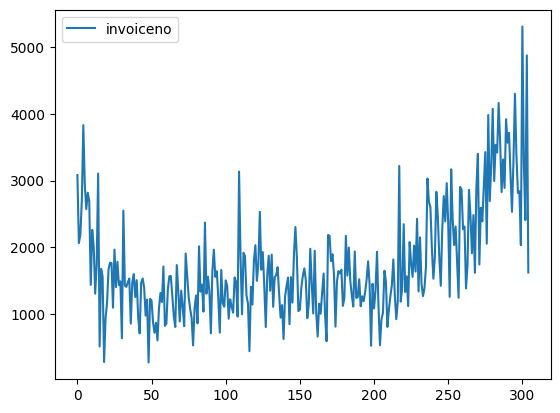

In [189]:
projetofinal.groupby('data')['invoiceno'].count().reset_index().plot()
plt.show()

Nesse gráfico foi feito um agrupamento por data e contado o número de pedidos nesses dias. E depois foi plotado em um gráfico de linha, mostrando a evolução ao longo dos dias. Analisando o gráfico, é possível perceber, que apesar de existir uma variação, a quantidade mantém razoavelmente estável ao longo dos dias até 09/2019 quando existe um crescimento razoável.

In [190]:
projetofinal.groupby('data')['customerid'].count().reset_index()

,data,customerid
0,2018-11-29,1968
1,2018-11-30,2044
2,2018-12-01,1117
3,2018-12-03,2724
4,2018-12-04,1974
...,...,...
300,2019-12-03,3398
301,2019-12-04,2654
302,2019-12-05,2196
303,2019-12-06,2599


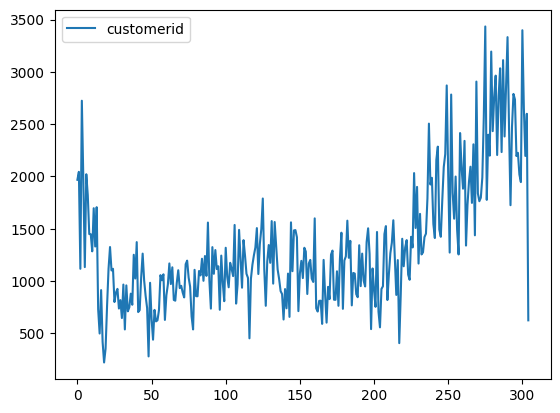

In [191]:
projetofinal.groupby('data')['customerid'].count().reset_index().plot()
plt.show()

Nesse código foi feito um agrupamento por data e contado o número de usuários que fizeram pedidos nesses dias. E depois foi plotado em um gráfico de linha, mostrando a evolução da quantidade de pedidos ao longo dos dias. Analisando o gráfico é possível concluir que existe uma grande variação entre os dias, porém a partir de 09/2019 aparenta ter um grande crescimento, mas com uma grande queda nos últimos dias. Ou seja, parece que está em crescimento de vendas.

In [192]:
projetofinal.groupby('data')['quantity'].sum().reset_index()

,data,quantity
0,2018-11-29,26814
1,2018-11-30,21023
2,2018-12-01,14830
3,2018-12-03,16395
4,2018-12-04,21419
...,...,...
300,2019-12-03,44119
301,2019-12-04,29026
302,2019-12-05,39612
303,2019-12-06,34460


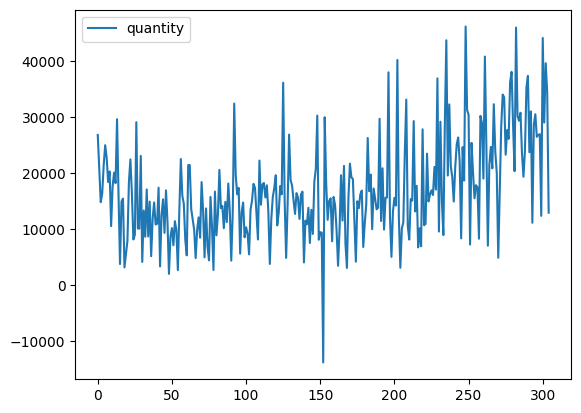

In [193]:
projetofinal.groupby('data')['quantity'].sum().reset_index().plot()
plt.show()

Nesse código foi feito um agrupamento por data e somado a quantidade pedida nesses dias. E depois foi plotado em um gráfico de linha, mostrando a evolução da quantidade pedida ao longo dos dias. Analisando o gráfico, é possível concluir, que apesar de existir uma variação, não existe um grande crescimento ou uma grande queda. E também é possível perceber que um dia o valor é negativo (devido aos valores negativos dessa coluna).

In [194]:
projetofinal.groupby('data')['unitprice'].sum().reset_index()

,data,unitprice
0,2018-11-29,12904.25
1,2018-11-30,6815.68
2,2018-12-01,11114.09
3,2018-12-03,7893.17
4,2018-12-04,17678.78
...,...,...
300,2019-12-03,57195.74
301,2019-12-04,10364.64
302,2019-12-05,9049.19
303,2019-12-06,21808.10


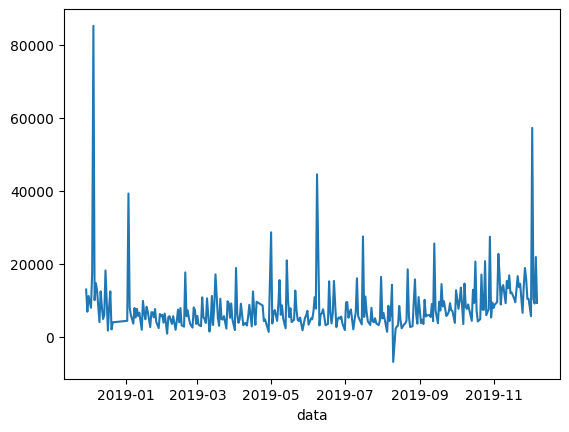

In [195]:
projetofinal.groupby('data')['unitprice'].sum().plot()
plt.show()

Nesse código foi feito um agrupamento por data e somado o valor de todos os itens dos pedidos nesses dias. E depois foi plotado em um gráfico de linha, mostrando a evolução ao longo dos dias. Analisando o gráfico, é possível perceber que a quantidade se mantém estável, porém com alguns picos, um no começo, um no meio e um no fim. Além disso, existe um dia que o valor é negativo.

In [196]:
projetofinal['dia'] = projetofinal['invoicedate'].dt.day

Nesse código foi criado uma coluna com os dias do mês em que foram efetuados compras, através da coluna "invoicedate".

In [197]:
projetofinal.groupby('dia')['customerid'].count().reset_index()

,dia,customerid
0,1,11069
1,2,15165
2,3,16723
3,4,18915
4,5,16011
5,6,16254
6,7,13225
7,8,14473
8,9,13707
9,10,10923


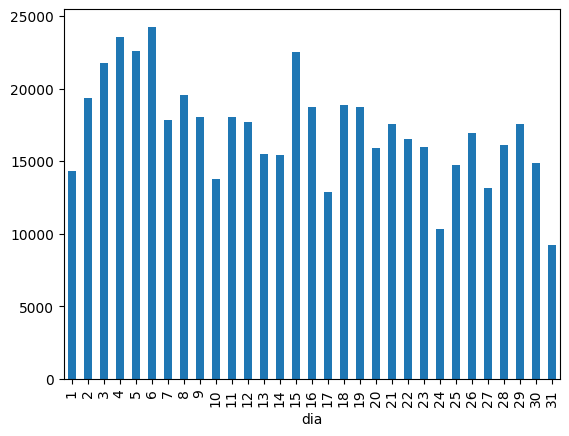

In [198]:
projetofinal.groupby('dia')['invoiceno'].count().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por dia do mês e contado o número de pedidos que acontece em cada dia. E depois foi plotado em um gráfico de barras, mostrando a evolução ao longo dos dias do mês. Analisando o gráfico é possível perceber que existe uma variação grande entre os dias.

In [199]:
projetofinal.groupby('dia')['quantity'].sum().reset_index()

,dia,quantity
0,1,152700
1,2,190694
2,3,228054
3,4,206115
4,5,230661
5,6,182879
6,7,169611
7,8,169828
8,9,204027
9,10,139775


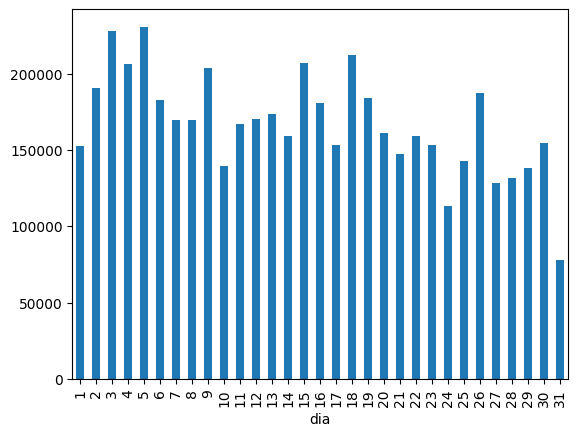

In [200]:
projetofinal.groupby('dia')['quantity'].sum().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por dia do mês e somado a quantidade pedida por dia. E depois foi plotado em um gráfico de barras, mostrando a evolução ao longo dos dias do mês. Analisando o gráfico é possível perceber qie existe uma variação grande entre os dias e uma grande queda no último dia (devido a nem todos os meses ter 31 dias).

In [201]:
projetofinal.groupby('dia')['customerid'].count().reset_index()

,dia,customerid
0,1,11069
1,2,15165
2,3,16723
3,4,18915
4,5,16011
5,6,16254
6,7,13225
7,8,14473
8,9,13707
9,10,10923


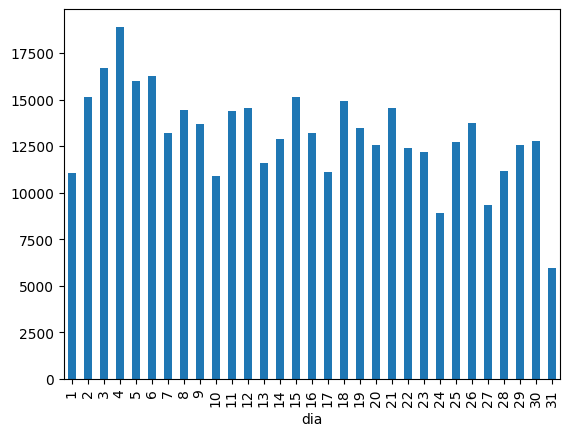

In [202]:
projetofinal.groupby('dia')['customerid'].count().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por dia do mês e contado o número de usuários que fizeram pedidos nesses dias. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que existe uma variação grande entre os dias e uma grande queda no último dia (devido a nem todos os meses ter 31 dias).

In [203]:
projetofinal.groupby('dia')['unitprice'].sum().reset_index()

,dia,unitprice
0,1,81495.370
1,2,80346.540
2,3,148066.210
3,4,83438.970
4,5,181806.380
5,6,105011.650
6,7,75395.150
7,8,127183.500
8,9,77675.900
9,10,39482.340


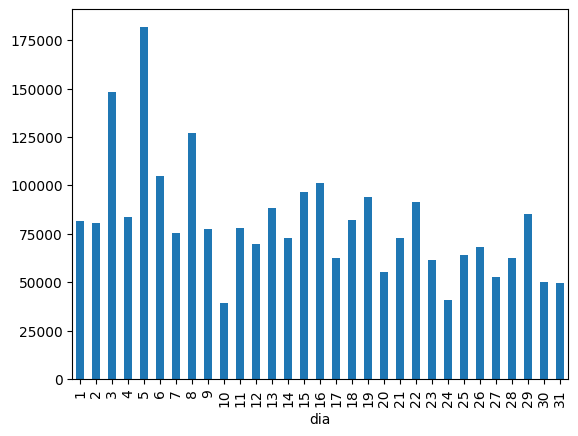

In [204]:
projetofinal.groupby('dia')['unitprice'].sum().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por dia do mês e somado o valor total de todos os itens vendidos nesses dias. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a quantidade se mantém razoavelmente estável, com exceção do dia 5 que tem um valor muito mais alto e no dia 10 que tem um valor muito mais baixo.

In [205]:
projetofinal['hora'] = projetofinal['invoicedate'].dt.hour

Nesse código foi criada uma coluna com as horas do dias em que foram efetuado compras, através da coluna "invoicedate".

In [206]:
projetofinal.groupby('hora')['invoiceno'].count().reset_index()

,hora,invoiceno
0,6,1
1,7,379
2,8,8807
3,9,33807
4,10,48028
5,11,56481
6,12,77371
7,13,71196
8,14,66445
9,15,76626


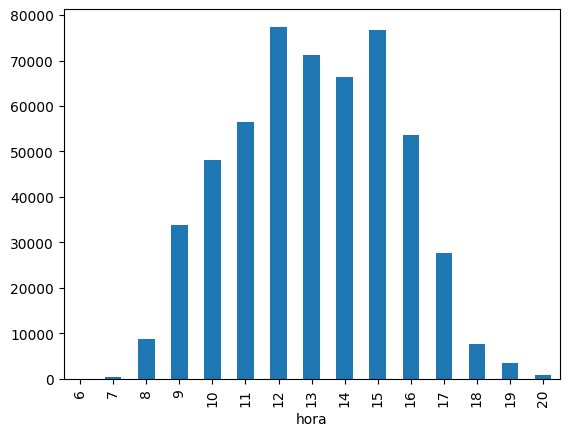

In [207]:
projetofinal.groupby('hora')['invoiceno'].count().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por hora do dia e contado o número de pedidos que acontece em cada hora. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a maioria dos pedidos acontecem entre o fim da manhã até o meio da tarde (10 ~ 16), ele fica semelhante a uma distribuição normal e que os pedidos só acontecem entre às 6 até às 20, porém com poucos vendas nas primerias horas e nas últimas.

In [208]:
projetofinal.groupby('hora')['quantity'].sum().reset_index()

,hora,quantity
0,6,-86
1,7,15361
2,8,158163
3,9,429366
4,10,684416
5,11,637672
6,12,823935
7,13,676803
8,14,571549
9,15,609710


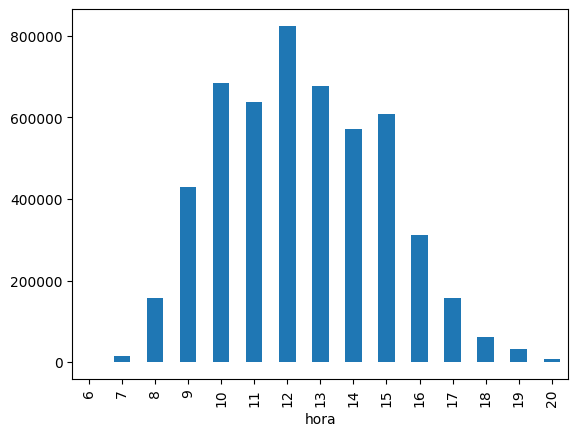

In [209]:
projetofinal.groupby('hora')['quantity'].sum().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por hora do dia e somado a quantidade pedida por hora. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a maioria dos pedidos acontecem entre o fim da manhã até o meio da tarde (10 ~ 16), ele fica semelhante a uma distribuição normal e que os pedidos só acontecem entre às 6 até às 20.

In [210]:
projetofinal.groupby('hora')['customerid'].count().reset_index()

,hora,customerid
0,6,41
1,7,383
2,8,8792
3,9,22464
4,10,38951
5,11,50249
6,12,73342
7,13,65062
8,14,55075
9,15,46220


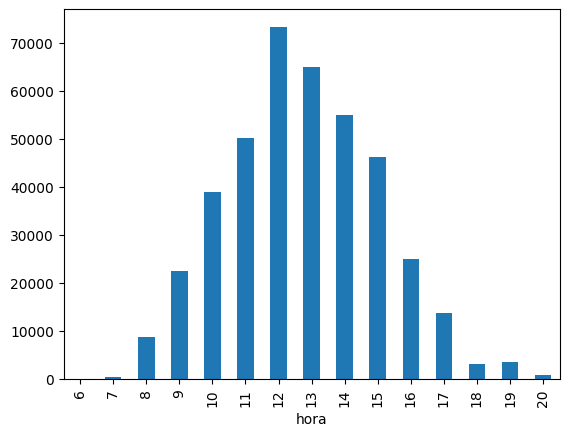

In [211]:
projetofinal.groupby('hora')['customerid'].count().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por hora do dia e contado o número de usuários que fizeram pedido. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a maioria dos pedidos acontecem entre às 11 até às 15 e os pdeidos acontecem entre 6 e 20.

In [212]:
projetofinal.groupby('hora')['unitprice'].sum().reset_index()

,hora,unitprice
0,6,440.660
1,7,1546.310
2,8,29930.330
3,9,188947.671
4,10,212692.181
5,11,268246.250
6,12,313903.320
7,13,295842.720
8,14,279164.021
9,15,487047.170


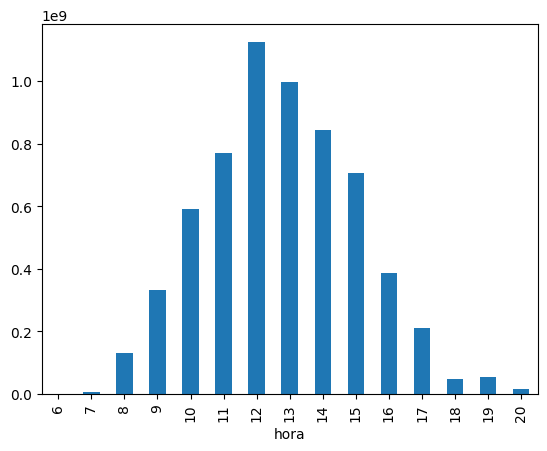

In [213]:
projetofinal.groupby('hora')['customerid'].sum().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por hora do dia e somado o valor total de todos os itens vendidos. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a maioria dos pedidos acontecem entre às 10 até às 15 e os pedidos acontcem entre 6 e 20.

In [214]:
projetofinal['mes'] = projetofinal['invoicedate'].dt.month

Nesse código foi criado uma coluna com os meses do ano em que foram efetuado pedidos, através da coluna "invoicedate".

In [215]:
projetofinal.groupby('mes')['invoiceno'].count().reset_index()

,mes,invoiceno
0,1,37383
1,2,26543
2,3,35043
3,4,28563
4,5,38928
5,6,34181
6,7,40375
7,8,35832
8,9,47101
9,10,62455


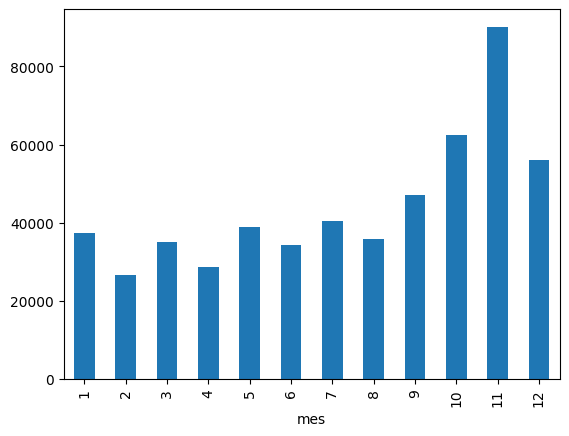

In [216]:
projetofinal.groupby('mes')['invoiceno'].count().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por mês do ano e contado o número de pedidos que acontece em cada mês. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a quantidade se mantém razoavelmente constante, tendo um pico no mês de novembro.

In [217]:
projetofinal.groupby('mes')['quantity'].sum().reset_index()

,mes,quantity
0,1,333661
1,2,273909
2,3,348631
3,4,275538
4,5,401295
5,6,324263
6,7,409329
7,8,419182
8,9,519643
9,10,607157


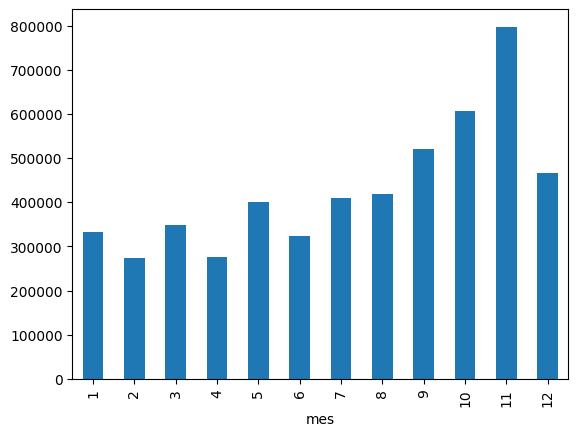

In [218]:
projetofinal.groupby('mes')['quantity'].sum().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por mês do ano e somado a quantidade pedida por mês. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que a quantidade está em crescimento a partir de setembro, com um pico no mês de novembro e uma grande queda em dezembro.

In [219]:
projetofinal.groupby('mes')['customerid'].count().reset_index()

,mes,customerid
0,1,24180
1,2,20130
2,3,26928
3,4,22509
4,5,30266
5,6,26902
6,7,28577
7,8,28256
8,9,39700
9,10,52832


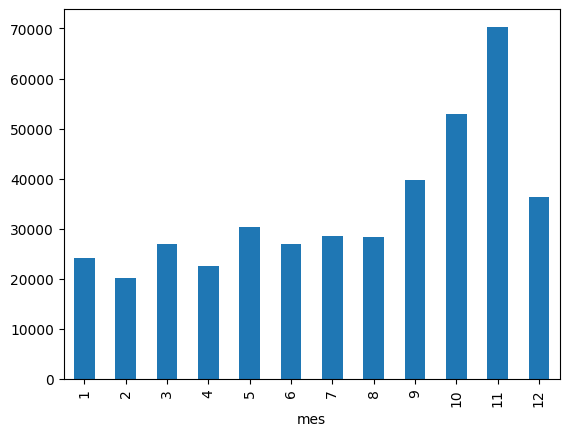

In [220]:
projetofinal.groupby('mes')['customerid'].count().plot(kind = 'bar')
plt.show()

Nesse gráfico foi feito um agrupamento por mês do ano e contado o número de usuários que fizeram pedido. E depois foi plotado em um gráfico. Analisando o gráfico é possível perceber que a quantidade está razoavelmente estável, acontece um crescimento a partir de setembro, um pico em novembro e uma grande queda em dezembro.

In [221]:
projetofinal.groupby('mes')['unitprice'].sum().reset_index()

,mes,unitprice
0,1,184293.110
1,2,126635.400
2,3,165443.920
3,4,125779.021
4,5,202283.310
5,6,191391.680
6,7,189085.491
7,8,144006.450
8,9,188607.572
9,10,274230.640


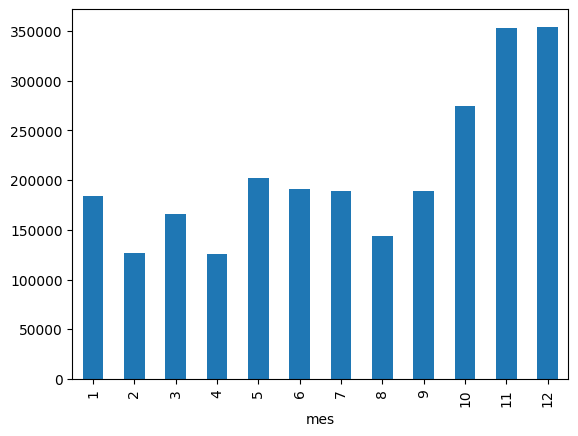

In [222]:
projetofinal.groupby('mes')['unitprice'].sum().plot(kind = 'bar')
plt.show()

Nesse código foi feito um agrupamento por mês do ano e somado o valor total de todos os itens vendidos. E depois foi plotado em um gráfico de barras. Analisando o gráfico é possível perceber que o valor está razoavelmente estável até novembro, quando acontece um grande pico que permance alto em dezembro também.

In [223]:
projetofinal['customerid'].nunique()

4372

In [224]:
projetofinal['data'].nunique()

305

In [225]:
projetofinal['invoiceno'].nunique()

22061

In [226]:
projetofinal['stockcode'].nunique()

4070

In [227]:
projetofinal['description'].nunique()

4223

In [228]:
projetofinal['quantity'].nunique()

722

In [229]:
projetofinal['invoicedate'].nunique()

23260

In [230]:
projetofinal['unitprice'].nunique()

1630

Nesses códigos foram analisados a quantidade de valores únicos para cada coluna. Analisando os resultados é possível perceber que possivelmente existem alguns erros. Por exemplo, a coluna "stockcode" (identificador de item) está diretamente relacionado com a coluna "description" (nome do item) e teoricamente cada item tem um identificados único e exclusivo, porém os valores são diferentes.

In [231]:
projetofinal['unitprice'].min()

-11062.06

In [232]:
projetofinal['unitprice'].max()

38970.0

Nesses códigos foram calculados os valores mínimos e máximos da coluna "unitprice". Analisando o resultado é possível perceber que o valor mínimo é um valor muito negativo, o que é um erro, pois um item não pode ter preço negativo. E o valor máximo é muito elevado, o que pode ser um erro ou será que um item tem valor muito alto?

In [233]:
projetofinal['quantity'].min()

-80995

In [234]:
projetofinal['quantity'].max()

80995

Nesses códigos foram calculados os valores mínimos e máximos da coluna "quantity". Analisando o resultado é possivel perceber que o valor mínimo é um valor muito negativo, o que mostra que o pedido foi cancelado. E o valor máximo é muito elevado, o que pode ser um erro ou algum pedido teve uma quantia bem elevada.

In [235]:
projetofinal['ano'] = projetofinal['invoicedate'].dt.year

Nesse código foi criado uma coluna com os anos em que foram efetuados pedidos, através da coluna "invoicedate".

In [236]:
projetofinal.groupby('customerid').agg({'data' : ['count', 'min', 'max'], 'quantity' : 'sum', 'unitprice' : 'sum'}).reset_index()

customerid  data                         quantity unitprice
                count         min         max      sum       sum
0       12346.0     2  2019-01-16  2019-01-16        0      2.08
1       12347.0   182  2018-12-05  2019-12-05     2458    481.21
2       12348.0    31  2018-12-14  2019-09-23     2341    178.71
3       12349.0    73  2019-11-19  2019-11-19      631    605.10
4       12350.0    17  2019-01-31  2019-01-31      197     65.30
...         ...   ...         ...         ...      ...       ...
4367    18280.0    10  2019-03-05  2019-03-05       45     47.65
4368    18281.0     7  2019-06-10  2019-06-10       54     39.36
4369    18282.0    13  2019-08-03  2019-11-30       98     62.68
4370    18283.0   756  2019-01-04  2019-12-04     1397   1220.93
4371    18287.0    70  2019-05-20  2019-10-26     1586    104.55

[4372 rows x 6 columns]

Nesse código foi feito um agrupamento por cliente e feito um agregado por qauntidade de pedidos, data mínima (primeira compra), data máxima (última compra), a quantidade comprada e o total gasto. Analisando a tabela resultangte é possível perceber que existe uma grande variação entre os clientes, seja na quantidade de pedidos, quando foi a primeira compra, quando foi a última compra, a quantidade comprada e a quantidade gasta. Com esse resultado podemos analisar a quanto tempo os clientes fizeram a última compra e se faz muito tempo, para com isso tentar entender o comportamento dos clientes e como podemos trabalhar com isso. 

In [237]:
projetofinal['data'] = pd.to_datetime(projetofinal['data'])
data_compra = projetofinal.groupby('customerid').agg({
    'data': ['count', 'min', 'max'],
    'quantity': 'sum',
    'unitprice': 'sum'
}).reset_index()
data_compra.columns = ['customerid', 'total_purchases', 'first_purchase_date', 'last_purchase_date', 'total_quantity', 'total_unitprice']
data_compra['last_purchase_date'] = pd.to_datetime(data_compra['last_purchase_date'])
data_final = pd.Timestamp('2019-12-07')
data_compra['time_since_last_purchase'] = (data_final - data_compra['last_purchase_date']).dt.days
clientes_mais_antigos = data_compra.sort_values(by='time_since_last_purchase', ascending=False)
print(clientes_mais_antigos)

      customerid  total_purchases first_purchase_date last_purchase_date  \
2907     16274.0               67          2018-11-29         2018-11-29   
1764     14729.0               71          2018-11-29         2018-11-29   
3129     16583.0               14          2018-11-29         2018-11-29   
359      12791.0                2          2018-11-29         2018-11-29   
4096     17908.0               58          2018-11-29         2018-11-29   
...          ...              ...                 ...                ...   
330      12748.0             4642          2018-11-29         2019-12-07   
1534     14422.0              222          2019-03-15         2019-12-07   
2562     15804.0              274          2019-05-23         2019-12-07   
556      13069.0              470          2018-12-03         2019-12-07   
146      12526.0               71          2019-09-04         2019-12-07   

      total_quantity  total_unitprice  time_since_last_purchase  
2907             155 

In [238]:
projetofinal['total_gasto'] = projetofinal['unitprice'] * projetofinal['quantity']

In [239]:
total_gasto_por_cliente = projetofinal.groupby('customerid')['total_gasto'].sum().reset_index()
total_gasto_por_cliente_sorted = total_gasto_por_cliente.sort_values(by='total_gasto', ascending=False)
print(total_gasto_por_cliente_sorted[['customerid', 'total_gasto']])

      customerid  total_gasto
1703     14646.0    279489.02
4233     18102.0    256438.49
3758     17450.0    187482.17
1895     14911.0    132572.62
55       12415.0    123725.45
...          ...          ...
125      12503.0     -1126.00
3870     17603.0     -1165.30
1384     14213.0     -1192.20
2236     15369.0     -1592.49
3756     17448.0     -4287.63

[4372 rows x 2 columns]


Nesse código foi calculado, através da data "atual" e a última compra de cada cliente, há quanto tempo cada cliente fez a última compra. Analisando o resultado é possível perceber que existem clientes que não compram a mais de um ano (provavelmente já perdemos esses clientes) e os clientes que continuam comprando. E com isso, analisar onde precisamos investir em marketing ou para quais clientes podemos dar mais atenção, entre outras ações.

In [240]:
projetofinal['quantity'].mean()

9.55224954743324

In [241]:
projetofinal['unitprice'].mean()

4.611113626088513

Nesses códigos foram calculados a média da quantidade por pedido e a média de preço por item. Porém, como nessas colunas existem vários valores negativos, esse valor pode estar muito longe do real.

In [242]:
projetofinal['description'] = projetofinal['description'].astype(str)

# Calcular o comprimento de cada descrição e criar uma nova coluna
projetofinal['description_length'] = projetofinal['description'].apply(len)

print(projetofinal)

        invoiceno stockcode                          description  quantity  \
0        536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365.0     71053                  WHITE METAL LANTERN         6   
2        536365.0    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904   581587.0     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905   581587.0     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906   581587.0     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907   581587.0     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908   581587.0     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid       data  h

Nesse código foi calculado a quantidade vendida de cada item, para com isso saber quais são os produtos mais vendidos e saber onde podemos investir mais e onde não investir tanto.

In [243]:
projetofinal.describe()

,invoiceno,quantity,unitprice,customerid,hora,dia,mes,ano,total_gasto,description_length
count,532618.000000,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,559965.752027,9.552250,4.611114,15287.690570,13.078729,14.944574,7.489907,2018.921609,17.987795,26.580341
std,13428.417281,218.081158,96.759853,1713.600303,2.443270,8.820646,3.498394,0.268787,378.810824,5.578571
min,536365.000000,-80995.000000,-11062.060000,12346.000000,6.000000,1.000000,1.000000,2018.000000,-168469.600000,1.000000
25%,547906.000000,1.000000,1.250000,13953.000000,11.000000,7.000000,5.000000,2019.000000,3.400000,23.000000
50%,560688.000000,3.000000,2.080000,15152.000000,13.000000,15.000000,8.000000,2019.000000,9.750000,27.000000
75%,571841.000000,10.000000,4.130000,16791.000000,15.000000,22.000000,11.000000,2019.000000,17.400000,31.000000
max,581587.000000,80995.000000,38970.000000,18287.000000,20.000000,31.000000,12.000000,2019.000000,168469.600000,35.000000


# Segmentação

Segmentação por frequência - mede a regularidade com que um cliente interage com sua empresa ou quantas compras realiza em um período específico

In [244]:
# Calcular a quantidade de pedidos distintos por customerid
quantidade_pedidos_por_customerid = projetofinal.groupby('customerid')['invoiceno'].nunique().reset_index(name='quantidade_pedidos')

# Classificar por quantidade de pedidos em ordem decrescente
quantidade_pedidos_por_customerid_sorted = quantidade_pedidos_por_customerid.sort_values(by='quantidade_pedidos', ascending=False)

# Exibir o DataFrame classificado
print(quantidade_pedidos_por_customerid_sorted)

      customerid  quantidade_pedidos
330      12748.0                 210
1895     14911.0                 201
4042     17841.0                 124
568      13089.0                  97
1674     14606.0                  93
...          ...                 ...
264      12666.0                   0
2506     15728.0                   0
1727     14679.0                   0
1318     14119.0                   0
1384     14213.0                   0

[4372 rows x 2 columns]


In [245]:
quantidade_pedidos_por_customerid_sorted.describe()

,customerid,quantidade_pedidos
count,4372.000000,4372.000000
mean,15299.677722,4.239707
std,1722.390705,7.685252
min,12346.000000,0.000000
25%,13812.750000,1.000000
50%,15300.500000,2.000000
75%,16778.250000,5.000000
max,18287.000000,210.000000


In [251]:
projetofinal = projetofinal.merge(quantidade_pedidos_por_customerid, on='customerid', how='left')

In [272]:
# Calcular os quartis
q1 = projetofinal['quantidade_pedidos'].quantile(0.25)  # 1º quartil (25%)
q2 = projetofinal['quantidade_pedidos'].quantile(0.50)  # 2º quartil (50% - Mediana)
q3 = projetofinal['quantidade_pedidos'].quantile(0.75)  # 3º quartil (75%)

# Exibir os quartis
print(f"1º Quartil (25%): {q1}")
print(f"Mediana (50%): {q2}")
print(f"3º Quartil (75%): {q3}")

1º Quartil (25%): 3.0
Mediana (50%): 7.0
3º Quartil (75%): 15.0


In [273]:
def classificar_quantidade(quantidade_pedidos):
    if quantidade_pedidos <= 3:
        return '25%'
    elif quantidade_pedidos <= 7:
        return 'mediana'
    elif quantidade_pedidos <= 15:
        return '75%'
    else:
        return 'max'

In [274]:
projetofinal['classificacao'] = projetofinal['quantidade_pedidos'].apply(classificar_quantidade)

# Exibir o DataFrame com a nova coluna de classificação
print(projetofinal[['classificacao', 'quantidade_pedidos', 'customerid']])

       classificacao  quantidade_pedidos  customerid
0                max                34.0     17850.0
1                max                34.0     17850.0
2                max                34.0     17850.0
3                max                34.0     17850.0
4                max                34.0     17850.0
...              ...                 ...         ...
541904       mediana                 4.0     12680.0
541905       mediana                 4.0     12680.0
541906       mediana                 4.0     12680.0
541907       mediana                 4.0     12680.0
541908       mediana                 4.0     12680.0

[541909 rows x 3 columns]


In [275]:
contagem = projetofinal.groupby('classificacao').size().reset_index(name='quantidade')

In [276]:
print(contagem)

  classificacao  quantidade
0           25%      106569
1           75%       92605
2           max      234334
3       mediana      108401


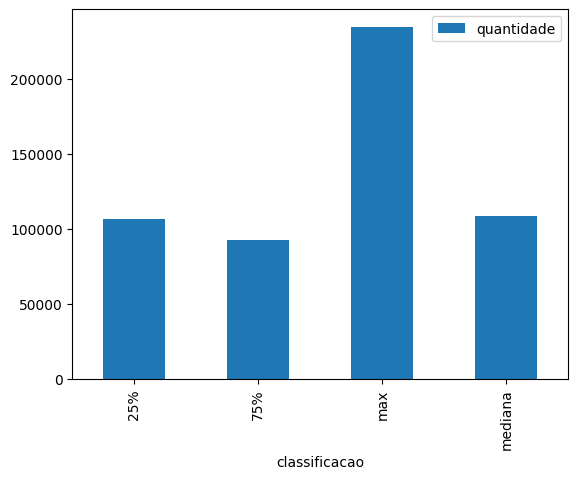

In [277]:
contagem.plot(kind = 'bar', x = 'classificacao')
plt.show()

Nesse código foi utilizado a segmentação RFM. Nesse código foi feito a análise por frequência, onde determinamos o nível de engajamento e lealdade do consumidor, pois os consumidores que fazem compras com frequência são mais valiosos. Ao segmentar os consumidores com base na frequência, é possível adaptar as campanhas de marketing para recompensar e reter consumidores de alta frequência, incentivar a recompra e aumentar o valor da vida útil do cliente (CLV). No caso desse código, foram divididos em 4 grupos, de acordo com os quartis. Depois fizemos um agrupamento para saber a quantidade em cada grupo. E depois foi plotado em um gráfico de barras. Com isso, é possível concluir que a maioria faz entre 7 e 15 pedidos.

In [73]:
clientes_mais_antigos.describe()

,customerid,total_purchases,total_quantity,total_unitprice,time_since_last_purchase
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,93.053294,1122.344007,322.008226,91.581199
std,1722.390705,232.471608,4672.790720,1284.783098,100.772139
min,12346.000000,1.000000,-303.000000,0.000000,0.000000
25%,13812.750000,17.000000,153.000000,52.865000,16.000000
50%,15300.500000,42.000000,365.000000,130.095000,50.000000
75%,16778.250000,102.000000,962.250000,302.332500,143.000000
max,18287.000000,7983.000000,196719.000000,41376.330000,373.000000


Segmentação por Recência - refere-se a quantidade de tempo que se passou desde a última compra.

In [278]:
# Calcular os quartis
q1 = clientes_mais_antigos['time_since_last_purchase'].quantile(0.25)  # 1º quartil (25%)
q2 = clientes_mais_antigos['time_since_last_purchase'].quantile(0.50)  # 2º quartil (50% - Mediana)
q3 = clientes_mais_antigos['time_since_last_purchase'].quantile(0.75)  # 3º quartil (75%)

# Exibir os quartis
print(f"1º Quartil (25%): {q1}")
print(f"Mediana (50%): {q2}")
print(f"3º Quartil (75%): {q3}")

1º Quartil (25%): 16.0
Mediana (50%): 50.0
3º Quartil (75%): 143.0


In [279]:
def time_since_last_purchase(time):
    if time <= 16:
        return '25%'
    elif time <= 50:
        return 'mediana'
    elif time <= 143:
        return '75%'
    else:
        return 'max'

In [280]:
clientes_mais_antigos['time'] = clientes_mais_antigos['time_since_last_purchase'].apply(time_since_last_purchase)

print(clientes_mais_antigos[['customerid', 'time_since_last_purchase', 'time']])

      customerid  time_since_last_purchase time
2907     16274.0                       373  max
1764     14729.0                       373  max
3129     16583.0                       373  max
359      12791.0                       373  max
4096     17908.0                       373  max
...          ...                       ...  ...
330      12748.0                         0  25%
1534     14422.0                         0  25%
2562     15804.0                         0  25%
556      13069.0                         0  25%
146      12526.0                         0  25%

[4372 rows x 3 columns]


In [281]:
contagem2 = clientes_mais_antigos.groupby('time').size().reset_index(name='quantidadetempo')
print(contagem2)

      time  quantidadetempo
0      25%             1096
1      75%             1064
2      max             1085
3  mediana             1127


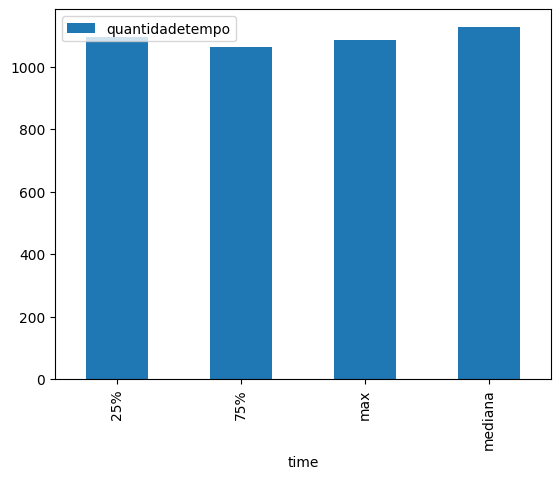

In [282]:
contagem2.plot(kind = 'bar', x = 'time')
plt.show()

Nesse código foi utilizado a segmentação RFM. Nesse código foi feita a análise por recência, onde determinamos há quanto tempo um cliente interagiu com sua empresa e identificar consumidores que fizeram uma compra recentemente e têm maior probabilidade de serem receptivos às comunicações de marketing. Por exemplo, os clientes que fizeram uma compra na última semanapodem estar mais inclinados a responder a um e-mail promocional em comparação com aqueles que não compram há meses. No caso desse código, foram divididos em 4 grupos, de acordo com os quartis. Depois fizemos um agrupamento para saber a quantidade em cada grupo. E depois foi plotado em um gráfico de barras. Com isso, podemos concluir que existe um equilibrio engtre os grupos e que devemos nos concentrar nos grupos 75% e max.

Segmentação por valor monetário - refere-se à quantidade de dinheiro que um cliente gastou em compras no seu e-commerce

In [283]:
# Calcular os quartis
q1 = projetofinal['total_gasto'].quantile(0.25)  # 1º quartil (25%)
q2 = projetofinal['total_gasto'].quantile(0.50)  # 2º quartil (50% - Mediana)
q3 = projetofinal['total_gasto'].quantile(0.75)  # 3º quartil (75%)

# Exibir os quartis
print(f"1º Quartil (25%): {q1}")
print(f"Mediana (50%): {q2}")
print(f"3º Quartil (75%): {q3}")

1º Quartil (25%): 3.4
Mediana (50%): 9.75
3º Quartil (75%): 17.4


In [284]:
def gasto(total_gasto):
    if total_gasto <= 3.4:
        return '25%'
    elif total_gasto <= 9.75:
        return 'mediana'
    elif total_gasto <= 17.4:
        return '75%'
    else:
        return 'max'

In [287]:
projetofinal['total'] = projetofinal['total_gasto'].apply(gasto)

# Exibir o DataFrame com a nova coluna de classificação
print(projetofinal[['total', 'total_gasto', 'customerid']])

       total  total_gasto  customerid
0        75%        15.30     17850.0
1        max        20.34     17850.0
2        max        22.00     17850.0
3        max        20.34     17850.0
4        max        20.34     17850.0
...      ...          ...         ...
541904   75%        10.20     12680.0
541905   75%        12.60     12680.0
541906   75%        16.60     12680.0
541907   75%        16.60     12680.0
541908   75%        14.85     12680.0

[541909 rows x 3 columns]


In [289]:
contagem3 = projetofinal.groupby('total').size().reset_index(name='quantidade')
print(contagem3)

     total  quantidade
0      25%      136340
1      75%      136781
2      max      133869
3  mediana      134919


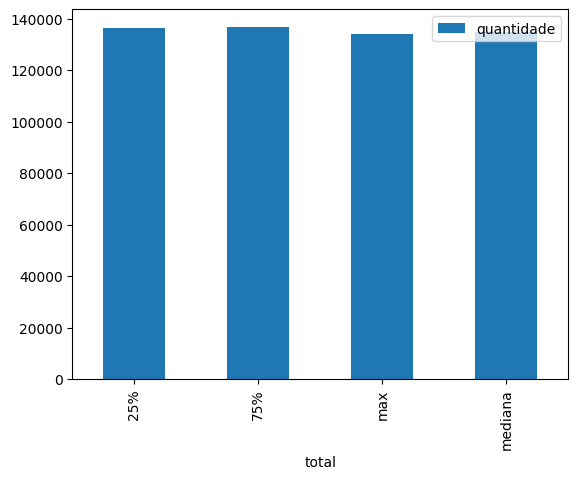

In [290]:
contagem3.plot(kind = 'bar', x = 'total')
plt.show()

Nesse código foi utilizado coma segmentação RFM. Nesse código foi feita a análise por valor monetário, onde identificamos clientes de alto valor que contribuem significativamente para sua receita. Ao segmentar os consumidores com base no valor monetário, é possível identificar os clientes mais valiosos e concentrar os esforços de marketing neles, como oferecendo ofertas exclusivas, recomendações de produtos personalizados ou tratamento VIP para maximizar sua fidelidade e gerar vendas adicionais. No caso desse código, foram divididos em 4 grupos, de acordo com os quartis. Depois fizemos um agrupamento para saber a quantidade em cada grupo. E depois foi plotado em um gráfico de barras. Com isso, podemos concluir que existe um equilibrio engtre os grupos e que devemos nos concentrar nos grupos 75% e max.

In [285]:
print(projetofinal.duplicated().sum())

5268


In [79]:
projetofinal = projetofinal.drop_duplicates().reset_index(drop=True)
print(projetofinal)

        invoiceno stockcode                          description  quantity  \
0        536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365.0     71053                  WHITE METAL LANTERN         6   
2        536365.0    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
536636   581587.0     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637   581587.0     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638   581587.0     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639   581587.0     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640   581587.0     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid       data  h

In [80]:
projetofinal['quantity'].mean()

9.620029032444409

In [81]:
projetofinal['unitprice'].mean()

4.632655674836623

Nessses códigos foram analisados os valores duplicados, removendo os mesmos e calculando a média da quantidade e do preço. Comparando com as médias com os valores duplicados, podemos perceber que o valor não muda muito, ou seja, esses valores não influenciam no resultado.

# Conclusão

- a quantidade de clientes, de pedidos, a quantidade e o valor total podem variar muito entre os dias, meses ou horas do dia, porpem em todos os casos existem picos. Ou seja, é possível saber quando e onde investir mais (um pouco antes do pico).
- é preciso entender o motivo de alguns clientes estarem cancelando suas compras.
- sabendo a data da última compra de cada cliente é possível saber quais clientes possivelmente já perdemos, quais mais compram, quais são novos. E com isso saber onde e quando investir.

Tableau:
https://public.tableau.com/app/profile/monica.prupst/viz/projetofinal2/classificaoxvaloresdemedida2?publish=yes

Apresentação e Revisão Bibliográfica:
https://drive.google.com/drive/u/0/folders/1Fi573RQwrdForNN_M-kWjnaiDxMj-gCb